In [1]:
import pandas as pd

In [3]:
import plotly.express as px

In [7]:
df = pd.read_csv('Airline_review.csv')

In [9]:
df.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.451165
std,6689.03588,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.594155
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
airlines_count = df['Airline Name'].nunique()
print("Number of airlines: ", airlines_count)

Number of airlines:  497


In [41]:
df.fillna(0, inplace=True)
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')
mean_overall_rating = df.groupby('Airline Name')['Overall_Rating'].mean().round(2)
print(mean_overall_rating)

Airline Name
AB Aviation               3.67
ANA All Nippon Airways    3.75
ASKY Airlines             2.26
ATA Airlines              1.50
Adria Airways             3.90
                          ... 
euroAtlantic Airways      2.06
fastjet                   2.88
flyadeal                  1.89
flybe                     1.25
flydubai                  1.65
Name: Overall_Rating, Length: 497, dtype: float64


In [43]:
df.fillna(0, inplace=True)
mean_seat_comfort = df.groupby('Airline Name')['Seat Comfort'].mean().round(2)
print(mean_seat_comfort)

Airline Name
AB Aviation               2.67
ANA All Nippon Airways    4.11
ASKY Airlines             1.96
ATA Airlines              1.00
Adria Airways             2.09
                          ... 
euroAtlantic Airways      1.38
fastjet                   2.55
flyadeal                  1.26
flybe                     2.50
flydubai                  1.61
Name: Seat Comfort, Length: 497, dtype: float64


In [45]:
df.fillna(0, inplace=True)
mean_cabin_service = df.groupby('Airline Name')['Cabin Staff Service'].mean().round(2)
print(mean_cabin_service)

Airline Name
AB Aviation               2.67
ANA All Nippon Airways    4.42
ASKY Airlines             1.70
ATA Airlines              1.50
Adria Airways             2.11
                          ... 
euroAtlantic Airways      1.88
fastjet                   2.48
flyadeal                  1.32
flybe                     3.25
flydubai                  1.76
Name: Cabin Staff Service, Length: 497, dtype: float64


In [47]:
df.fillna(0, inplace=True)
mean_food = df.groupby('Airline Name')['Food & Beverages'].mean().round(2)
print(mean_food)

Airline Name
AB Aviation               2.00
ANA All Nippon Airways    3.76
ASKY Airlines             1.43
ATA Airlines              1.50
Adria Airways             1.24
                          ... 
euroAtlantic Airways      1.88
fastjet                   1.03
flyadeal                  0.68
flybe                     2.25
flydubai                  1.21
Name: Food & Beverages, Length: 497, dtype: float64


In [49]:
df.fillna(0, inplace=True)
mean_entertainment = df.groupby('Airline Name')['Inflight Entertainment'].mean().round(2)
print(mean_entertainment)

Airline Name
AB Aviation               0.00
ANA All Nippon Airways    3.39
ASKY Airlines             0.52
ATA Airlines              0.00
Adria Airways             0.60
                          ... 
euroAtlantic Airways      1.25
fastjet                   0.27
flyadeal                  0.21
flybe                     0.00
flydubai                  0.84
Name: Inflight Entertainment, Length: 497, dtype: float64


In [51]:
df.fillna(0, inplace=True)
mean_wifi = df.groupby('Airline Name')['Wifi & Connectivity'].mean().round(2)
print(mean_wifi)

Airline Name
AB Aviation               0.00
ANA All Nippon Airways    1.32
ASKY Airlines             0.17
ATA Airlines              0.00
Adria Airways             0.21
                          ... 
euroAtlantic Airways      0.62
fastjet                   0.15
flyadeal                  0.21
flybe                     0.00
flydubai                  0.53
Name: Wifi & Connectivity, Length: 497, dtype: float64


In [53]:
df.fillna(0, inplace=True)
mean_value4money = df.groupby('Airline Name')['Value For Money'].mean().round(2)
print(mean_value4money)

Airline Name
AB Aviation               2.33
ANA All Nippon Airways    4.11
ASKY Airlines             1.57
ATA Airlines              2.00
Adria Airways             2.26
                          ... 
euroAtlantic Airways      1.44
fastjet                   2.27
flyadeal                  1.74
flybe                     3.25
flydubai                  1.43
Name: Value For Money, Length: 497, dtype: float64


In [57]:
result_df = pd.DataFrame({
    'Airline Name': df['Airline Name'].unique(),
    'Mean Overall Rating': mean_overall_rating,
    'Mean Seat Comfort': mean_seat_comfort,
    'Mean Cabin Staff Service': mean_cabin_service,
    'Mean Food & Beverages': mean_food,
    'Mean Inflight Entertainment': mean_entertainment,
    'Mean Wifi & Connectivity': mean_wifi,
    'Mean Value For Money': mean_value4money
})

result_df.columns = ['Airline Name', 'Mean Overall Rating','Mean Seat Comfort', 'Mean Cabin Staff Service', 'Mean Food & Beverages', 'Mean Inflight Entertainment', 'Mean Wifi & Connectivity','Mean Value For Money']
result_df.fillna(0, inplace=True)
result_df.to_csv('airlines_mean_scores.csv', index=False)

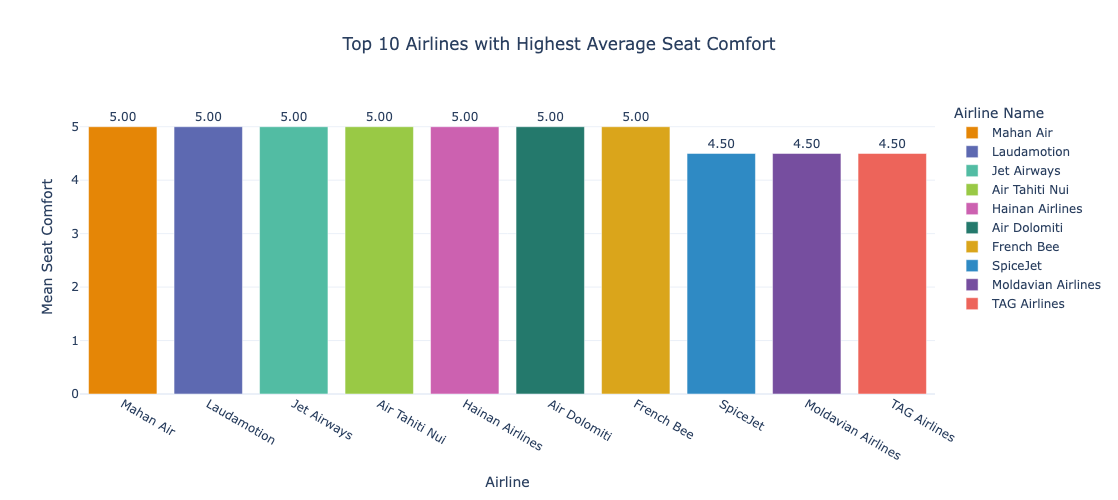

None


In [85]:
top_10_airlines = result_df.sort_values(by='Mean Seat Comfort', ascending=False).head(10)

fig = px.bar(
    top_10_airlines,
    x='Airline Name',
    y='Mean Seat Comfort',
    text='Mean Seat Comfort',
    title='Top 10 Airlines with Highest Average Seat Comfort',
    labels={'Airline': 'Airline Name', 'Mean Seat Comfort': 'Mean Seat Comfort'},
    template='plotly_white',
    color = 'Airline Name',
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Airline',
    yaxis_title='Mean Seat Comfort',
    yaxis=dict(range=[0, top_10_airlines['Mean Seat Comfort'].max() + 0.5]),
    height = 500,
    width = 800,
    title_x=0.5
)
print(fig.show())


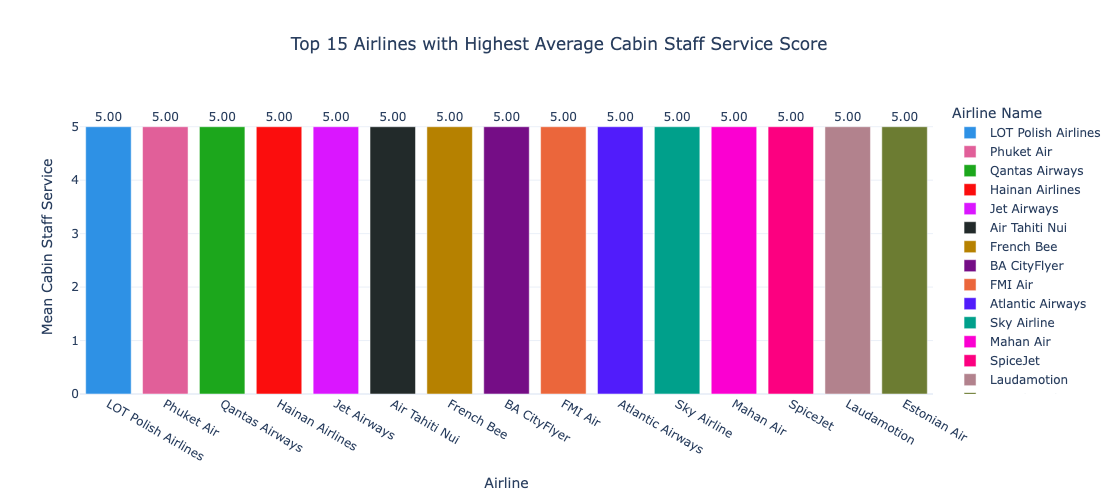

None


In [87]:
top_15_airlines = result_df.sort_values(by='Mean Cabin Staff Service', ascending=False).head(15)

fig2 = px.bar(
    top_15_airlines,
    x='Airline Name',
    y='Mean Cabin Staff Service',
    text='Mean Cabin Staff Service',
    title='Top 15 Airlines with Highest Average Cabin Staff Service Score',
    labels={'Airline': 'Airline Name', 'Mean Cabin Staff Service': 'Mean Cabin Staff Service'},
    template='plotly_white',
    color = 'Airline Name',
    color_discrete_sequence=px.colors.qualitative.Dark24
)
fig2.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig2.update_layout(
    xaxis_title='Airline',
    yaxis_title='Mean Cabin Staff Service',
    yaxis=dict(range=[0, top_15_airlines['Mean Cabin Staff Service'].max() + 0.5]),
    height = 500,
    width = 800,
    title_x=0.5
)
print(fig2.show())


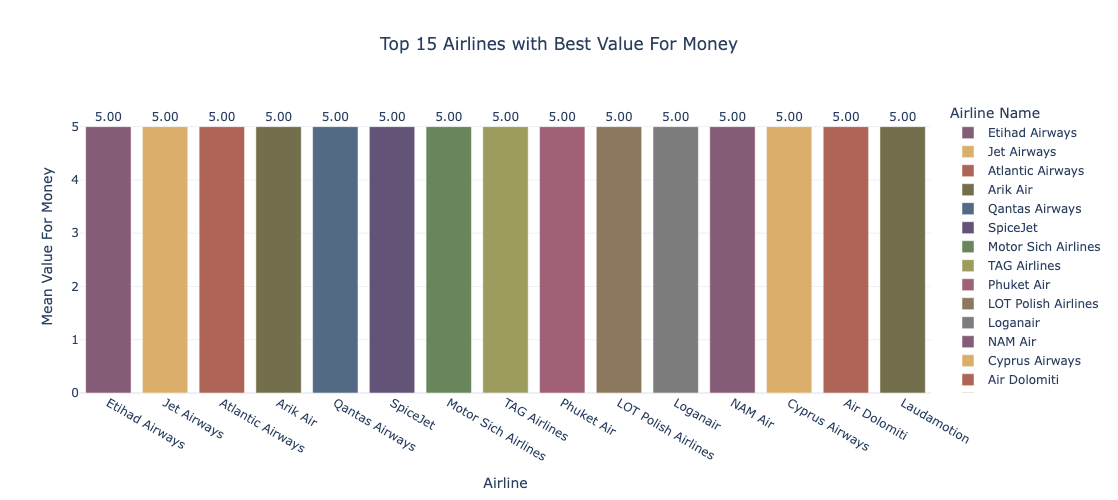

None


In [89]:
top_15_airlines2 = result_df.sort_values(by='Mean Value For Money', ascending=False).head(15)

fig3 = px.bar(
    top_15_airlines2,
    x='Airline Name',
    y='Mean Value For Money',
    text='Mean Value For Money',
    title='Top 15 Airlines with Best Value For Money',
    labels={'Airline': 'Airline Name', 'Mean Value For Money': 'Mean Value For Money'},
    template='plotly_white',
    color = 'Airline Name',
    color_discrete_sequence=px.colors.qualitative.Antique
)
fig3.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig3.update_layout(
    xaxis_title='Airline',
    yaxis_title='Mean Value For Money',
    yaxis=dict(range=[0, top_15_airlines2['Mean Seat Comfort'].max() + 0.5]),
    height = 500,
    width = 800,
    title_x=0.5
)
print(fig3.show())

The airline with the most reviews is Jetblue Airways  with  100  reviews.
The airline with the least reviews is JC International Airlines  with 1  reviews.


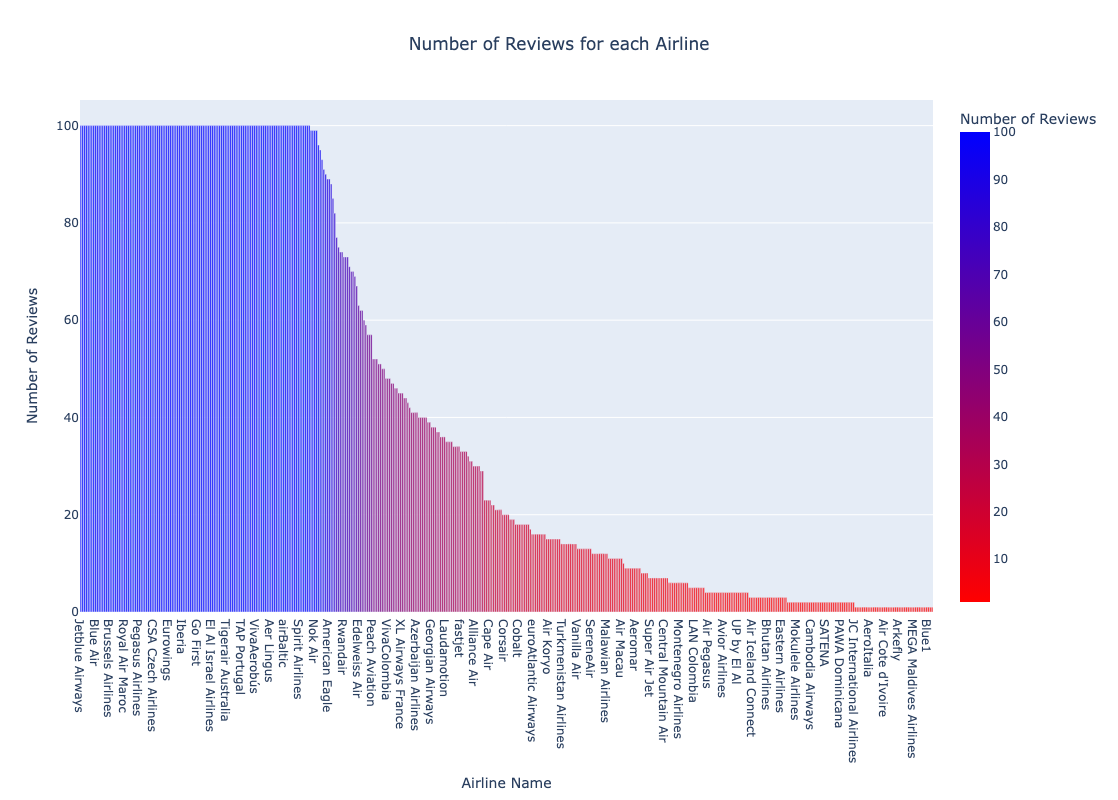

None


In [83]:
reviews_counts = df['Airline Name'].value_counts().reset_index()
reviews_counts.columns = ['Airline Name', 'Review Count']

most_reviews_airline = reviews_counts.loc[reviews_counts['Review Count'].idxmax()]
least_reviews_airline = reviews_counts.loc[reviews_counts['Review Count'].idxmin()]

print("The airline with the most reviews is", most_reviews_airline['Airline Name']," with ",most_reviews_airline['Review Count']," reviews.")
print("The airline with the least reviews is" ,least_reviews_airline['Airline Name']," with",least_reviews_airline['Review Count']," reviews.")


fig4 = px.bar(reviews_counts,
              x = 'Airline Name',
              y = 'Review Count',
              title = 'Number of Reviews for each Airline',
              labels = {'Airline Name': 'Airline Name', 'Review Count': 'Number of Reviews'},
              color = 'Review Count',
              color_continuous_scale='Bluered_r'
              )

fig4.update_layout(
    xaxis_title='Airline Name',
    yaxis_title='Number of Reviews',
    height = 800,
    width = 1000,
    title_x=0.5
)

print(fig4.show())

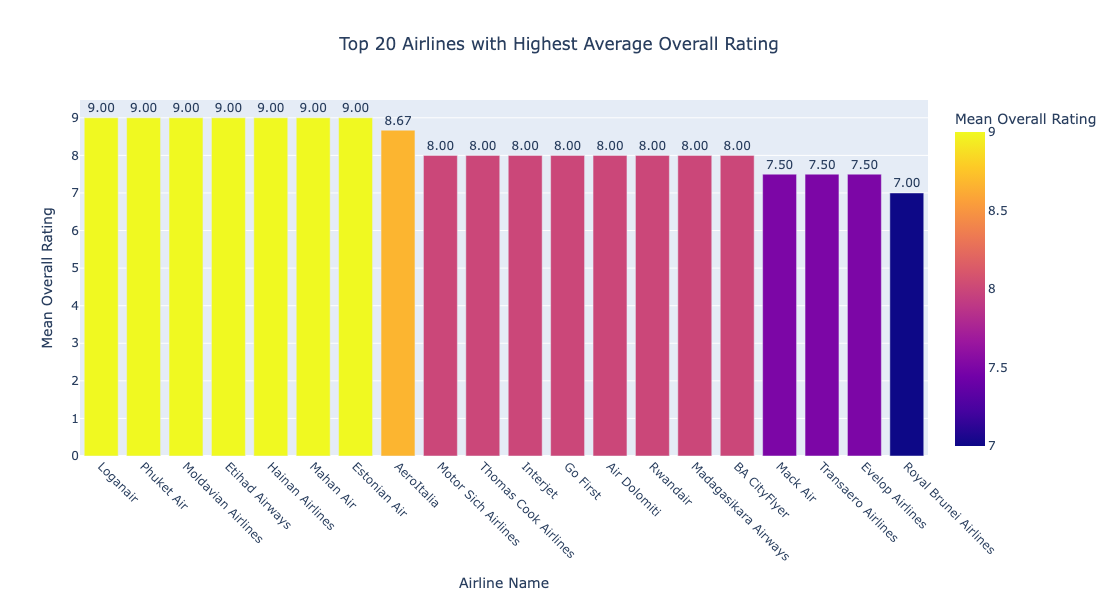

None


In [93]:
fig5 = px.bar(
    result_df.sort_values(by='Mean Overall Rating', ascending=False).head(20),
    x='Airline Name',
    y='Mean Overall Rating',
    text='Mean Overall Rating',
    title='Top 20 Airlines with Highest Average Overall Rating',
    labels={'Airline Name': 'Airline Name', 'Overall Rating': 'Mean Overall Rating'},
    color='Mean Overall Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig5.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig5.update_layout(
    xaxis_title='Airline Name',
    yaxis_title='Mean Overall Rating',
    height = 600,
    width = 900,
    title_x=0.5,
    xaxis=dict(tickangle=45)
)

print(fig5.show())


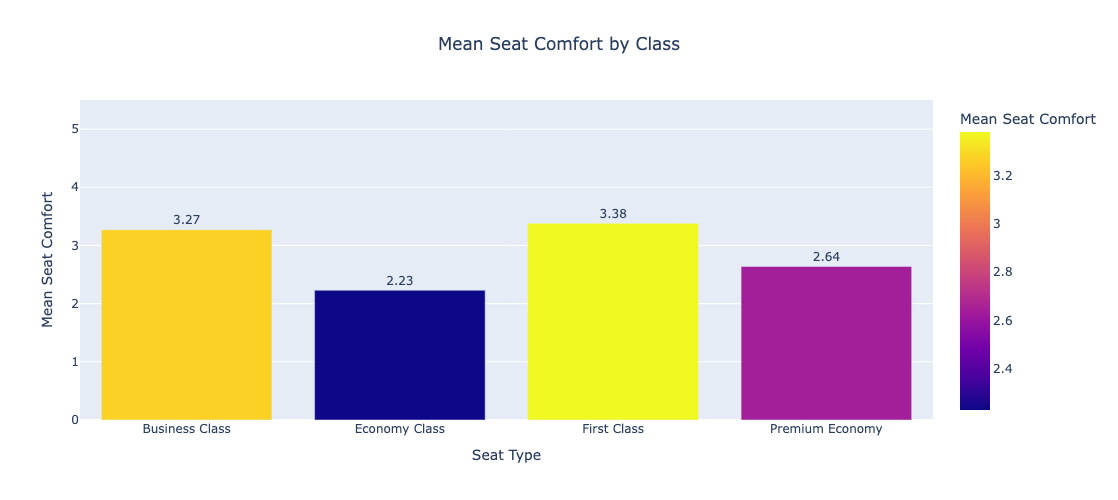

None


In [95]:
if 'Seat Type' in df.columns:
    df = df[df['Seat Type'] != 0]

mean_seat_comfort_by_class = df.groupby('Seat Type')['Seat Comfort'].mean().round(2).reset_index()

fig6 = px.bar(
    mean_seat_comfort_by_class,
    x = 'Seat Type',
    y = 'Seat Comfort',
    text = 'Seat Comfort',
    title = 'Mean Seat Comfort by Class',
    labels = {'Seat Type': 'Seat Type', 'Seat Comfort': 'Mean Seat Comfort'},
    color = 'Seat Comfort'
)

fig6.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig6.update_layout(
    xaxis_title='Seat Type',
    yaxis_title='Mean Seat Comfort',
    yaxis=dict(range=[0, top_15_airlines['Mean Seat Comfort'].max() + 0.5]),
    height = 500,
    width = 800,
    title_x= 0.5
)

print(fig6.show())

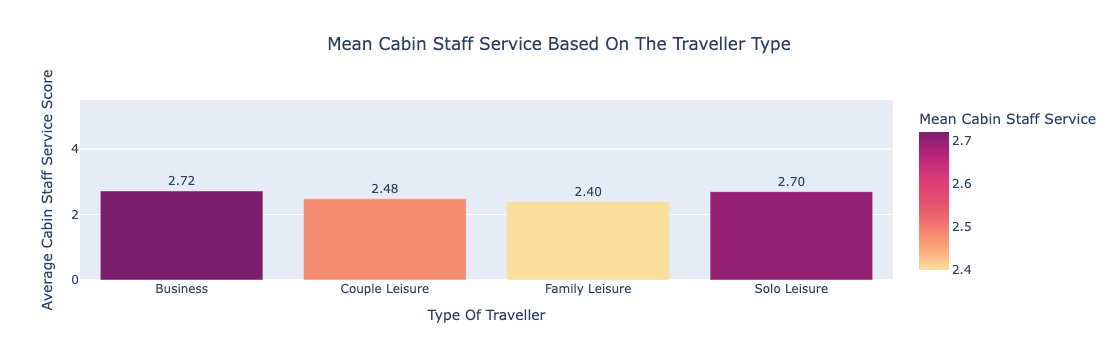

None


In [77]:
if 'Type Of Traveller' in df.columns:
    df = df[df['Type Of Traveller'] != 0]
mean_service_by_traveller_type = df.groupby('Type Of Traveller')['Cabin Staff Service'].mean().round(2).reset_index()

fig7 = px.bar(
    mean_service_by_traveller_type,
    x = 'Type Of Traveller',
    y = 'Cabin Staff Service',
    text = 'Cabin Staff Service',
    title = 'Mean Cabin Staff Service Based On The Traveller Type',
    labels = {'Type Of Traveller': 'Type Of Traveller', 'Cabin Staff Service': 'Mean Cabin Staff Service'},
    color = 'Cabin Staff Service',
    color_continuous_scale = 'Sunsetdark'

)

fig7.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig7.update_layout(
    xaxis_title='Type Of Traveller',
    yaxis_title='Average Cabin Staff Service Score',
    yaxis=dict(range=[0, top_15_airlines['Mean Cabin Staff Service'].max() + 0.5]),
    title_x= 0.5
)

print(fig7.show())